#### CAR PRICE PREDICTION PROJECT 

##### Cleaning and Preprocessing

In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


In [3]:
# Loading and viewing the data 
data = pd.read_csv(r'C:\Users\Makena\Desktop\Lux\Python-Assignments\Car-Prices-Project\cardekho.csv')

df = pd.DataFrame(data)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
# Checking for missing values and printing out the percentages
data_type = df.dtypes
missing = df.isnull().sum()
missing_ratio = round((missing /df.shape[0])*100,2)
pd.DataFrame({"Missing_Value_Count" : missing, "Null_Ratio" : missing_ratio, "Data_Type" : data_type})

,Missing_Value_Count,Null_Ratio,Data_Type
name,0,0.00,object
year,0,0.00,int64
selling_price,0,0.00,int64
km_driven,0,0.00,int64
fuel,0,0.00,object
seller_type,0,0.00,object
transmission,0,0.00,object
owner,0,0.00,object
mileage(km/ltr/kg),221,2.72,float64
engine,221,2.72,float64


In [5]:
# max_power is of type object
# Strip any white spaces in the max power column and converting it to numeric data type
df['max_power']= df['max_power'].str.strip()
df['max_power']= pd.to_numeric(df['max_power'])

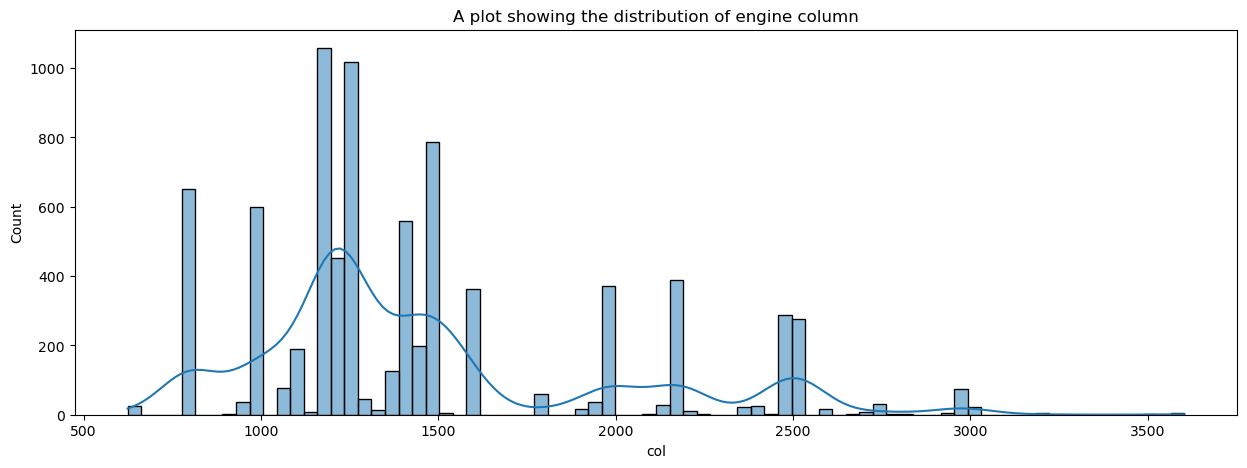

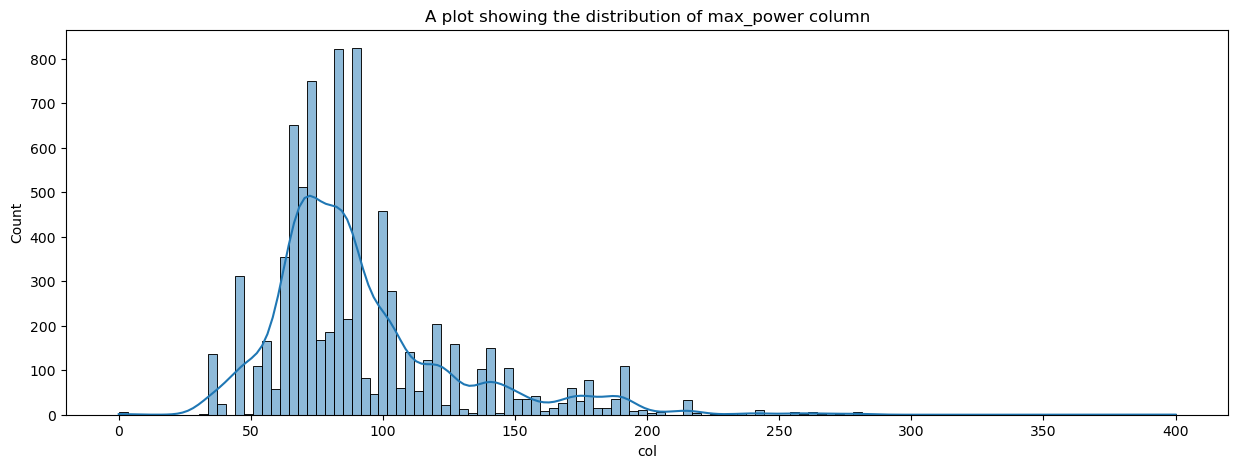

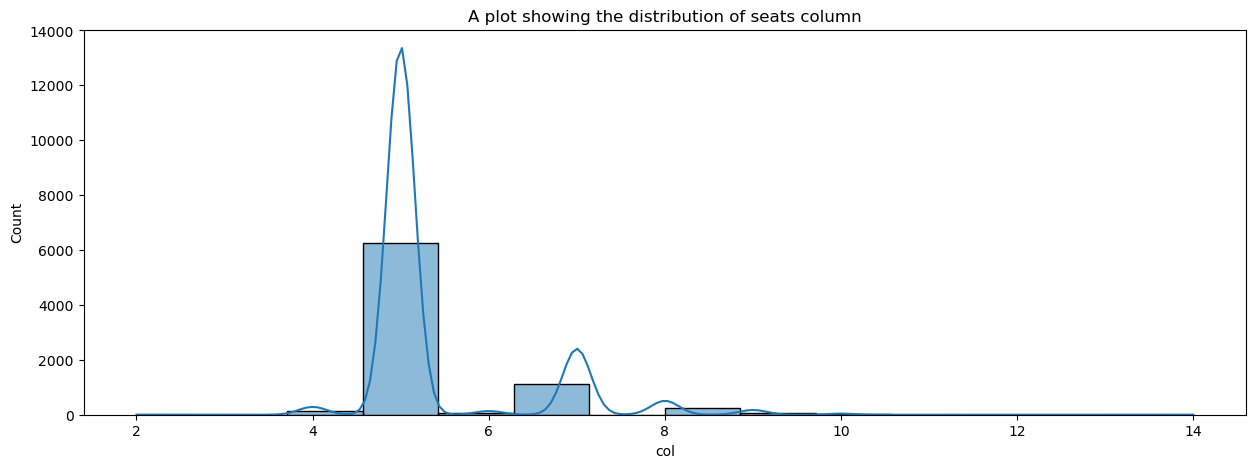

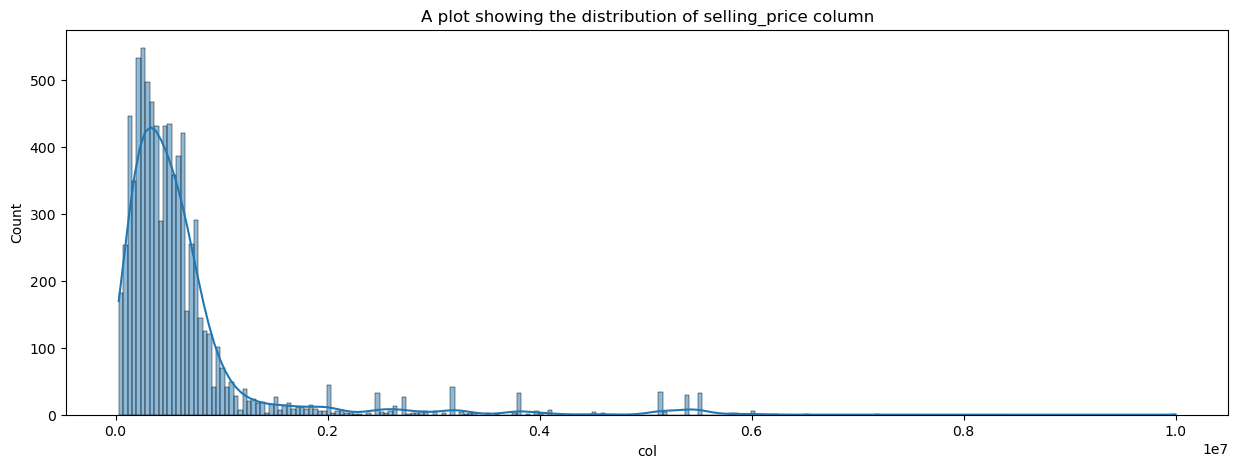

In [6]:
# visualizing the distribution to check for skewness
columns = ["engine","max_power","seats", "selling_price"]
for col in columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel("col")

In [7]:
# filling missing values using the median 
df = df.fillna(df.median(numeric_only=True))

In [8]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6926.0,2013.420300,4.078286,1983.0,2011.00,2014.00,2017.00,2020.0
selling_price,6926.0,517270.678458,519766.985985,29999.0,250000.00,400000.00,633500.00,10000000.0
km_driven,6926.0,73995.676437,58358.095175,1.0,40000.00,70000.00,100000.00,2360457.0
mileage(km/ltr/kg),6926.0,19.460345,3.987976,0.0,16.95,19.30,22.32,42.0
engine,6926.0,1425.398787,487.026967,624.0,1197.00,1248.00,1498.00,3604.0
max_power,6926.0,87.556583,31.310612,0.0,68.00,81.86,99.00,400.0
seats,6926.0,5.421600,0.972171,2.0,5.00,5.00,5.00,14.0


In [10]:
# Extracting the age of the car
df['age']= 2025-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [11]:
# Checking for unique values 
# for the entire data set
df.nunique() 

name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     381
engine                 121
max_power              319
seats                    9
age                     29
dtype: int64

In [12]:
# Value count for fuel column
df['fuel'].value_counts()

fuel
Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: count, dtype: int64

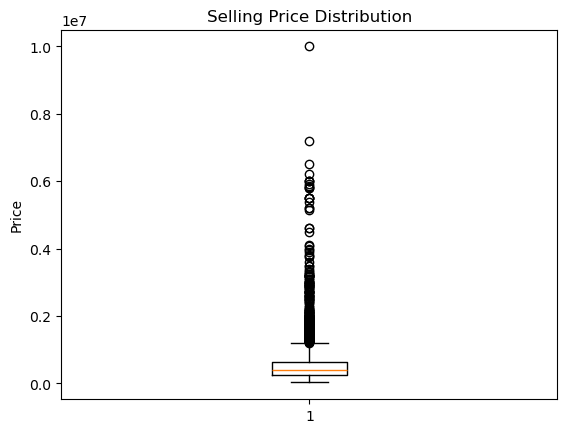

In [13]:
# Visualize target in order to understand the distribution
plt.boxplot(df['selling_price'])
plt.title("Selling Price Distribution")
plt.ylabel("Price")
plt.show()

In [14]:
# Getting rid of possible outliers
df =df.loc[df['selling_price']<= 2500000]

In [15]:
# new column for price per km
df['price_per_km'] = df['selling_price'] / df['mileage(km/ltr/kg)']

In [16]:
# proper indexing of columns after removing duplicates
# Resetting the index
df = df.reset_index(drop = True)
#df.tail(20)

#### EDA

In [17]:
# Average selling price 
mean_price = np.mean(df['selling_price'])
print(f"The average selling price:", mean_price)

The average selling price: 476857.47756831796


In [18]:
# Most used fuel type
df['fuel'].value_counts()

fuel
Diesel    3681
Petrol    3068
CNG         56
LPG         38
Name: count, dtype: int64

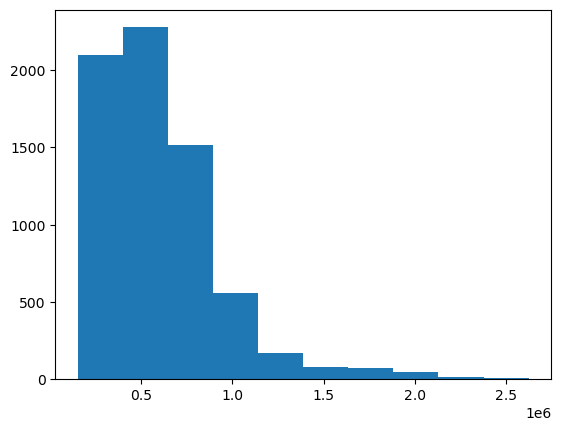

In [19]:
# Visualizing the selling price 
plt.hist(df['selling_price'], bins = 10, align = 'right')
plt.show()

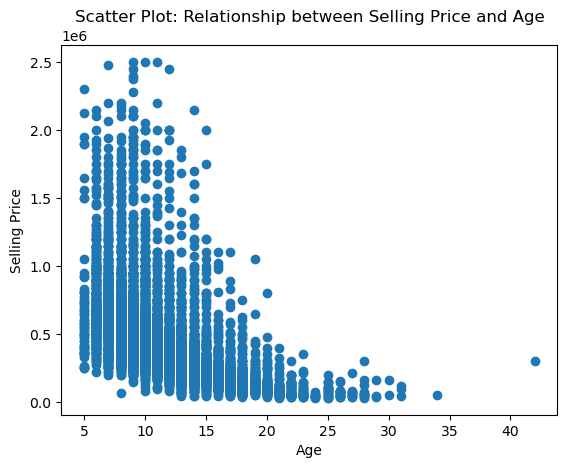

In [20]:
# Visualize relationship between car age and selling price
plt.scatter(df['age'], df['selling_price'])
plt.xlabel("Age")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Relationship between Selling Price and Age")
plt.grid(False)
plt.show()

In [21]:
# Grouping cars by fuel type and finding the average selling price 
fuel_groups = df.groupby("fuel")['selling_price'].agg(["count","mean","sum"])
fuel_groups

,count,mean,sum
fuel,,,
CNG,56,300499.946429,16827997
Diesel,3681,578936.640043,2131065772
LPG,38,200421.052632,7616000
Petrol,3068,361025.407432,1107625950


(array([6338.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         505.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

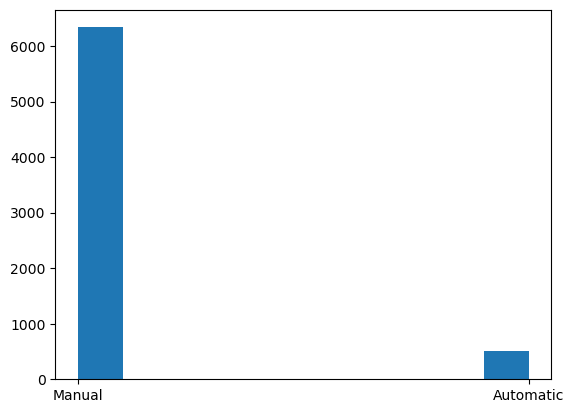

In [22]:
# Number of cars per transmission type
plt.hist(df['transmission'])

In [23]:
#max mileage
max_mileage= df.loc[df['mileage(km/ltr/kg)'].idxmax()]
print(f"Details for the car with highest mileage:\n{max_mileage}")


Details for the car with highest mileage:
name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
age                                                  6
price_per_km                               9868.421053
Name: 35, dtype: object


In [24]:
# Correlation between mileage and selling price
df['mileage(km/ltr/kg)'].corr(df['selling_price'])

-0.08011308836069986

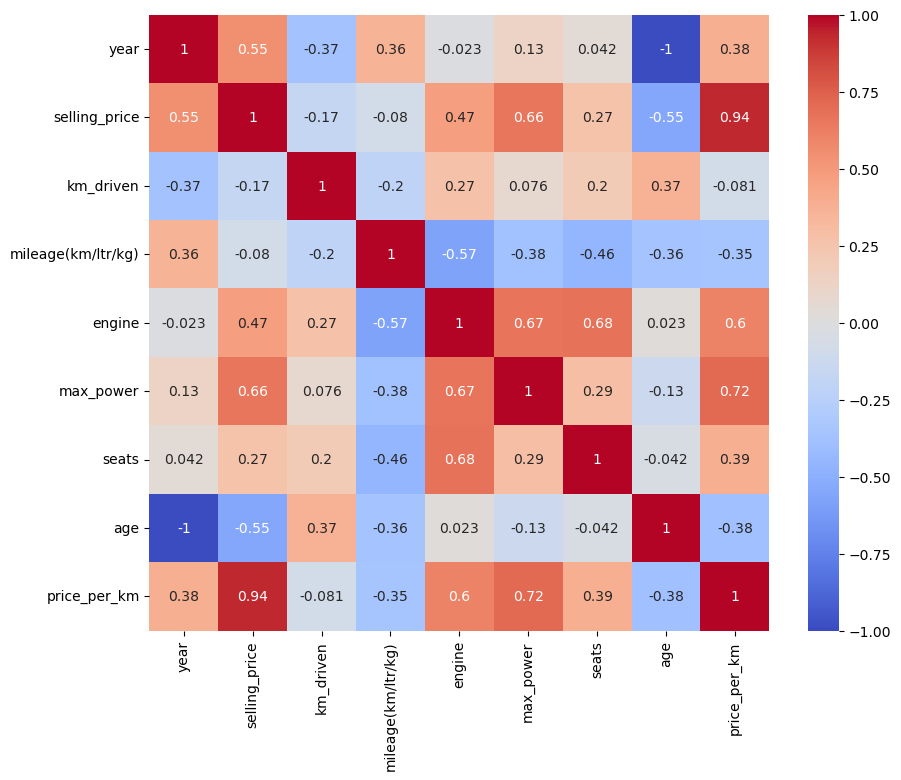

In [25]:
# Correlation matrix
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()  # default = Pearson correlation
#print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Grouping cars by transmission to find out which ones are more expensive
transmission_groups = df.groupby("transmission")['selling_price'].agg(["count","sum","mean"])
transmission_groups

,count,sum,mean
transmission,,,
Automatic,505,457440986,905823.734653
Manual,6338,2805694733,442678.247554


In [27]:
# Average selling price for each year of manufucture
year_groups = df.groupby("year")['selling_price'].agg(['sum', 'mean']).round(3)
year_groups

,sum,mean
year,,
1983,300000,300000.000
1991,55000,55000.000
1994,264000,88000.000
1995,215000,107500.000
1996,245000,81666.667
1997,991999,90181.727
1998,731000,73100.000
1999,1215000,71470.588
2000,1800957,90047.850


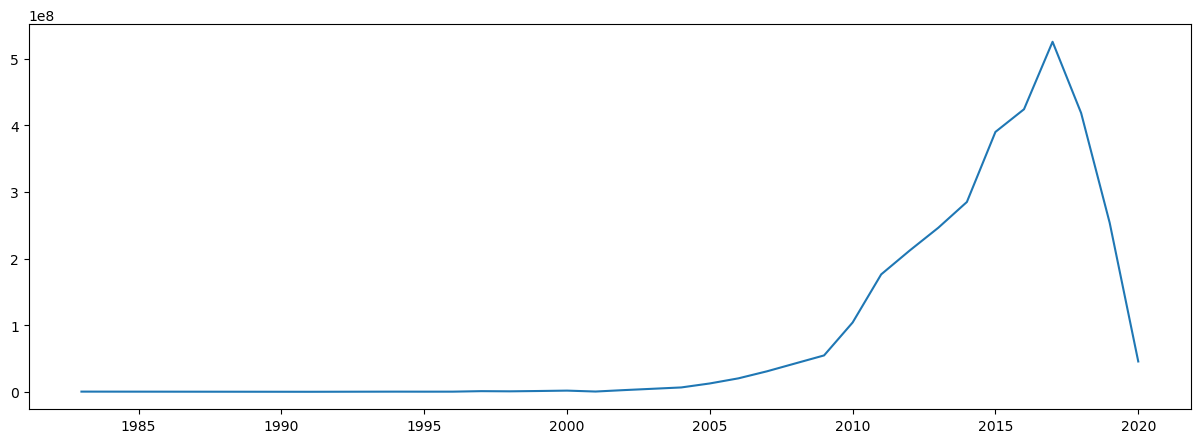

In [28]:
# Trend in selling price over the years
plt.figure(figsize=(15,5))
plt.plot(year_groups.index, year_groups['sum'])

In [29]:
# most expensive car for each fuel type
max_cars = df.loc[df.groupby("fuel")['selling_price'].idxmax()]
print(max_cars[['name','fuel', 'selling_price']])

                                       name    fuel  selling_price
4910  Maruti Ertiga VXI CNG Limited Edition     CNG         545000
4098                       Jaguar XF Diesel  Diesel        2500000
2746            Hyundai i10 Sportz 1.1L LPG     LPG         375000
82                   BMW X1 sDrive20i xLine  Petrol        2500000


In [30]:
# the most frequent brand
df['Brand']=df['name'].apply(lambda name: name.split(" ")[0])
df['Brand'].value_counts().head()

Brand
Maruti      2165
Hyundai     1267
Mahindra     723
Tata         647
Honda        362
Name: count, dtype: int64

##### Machine Learning

In [31]:
# Drop columns that are not needed for ML / Repetitive columns 
df = df.drop(['name','age','price_per_km','Brand'], axis=1)

In [32]:
# Encoding for the categorical columns
categorical = ['fuel', 'seller_type','transmission', 'owner']

df_encoded = pd.get_dummies(df, columns= categorical, drop_first= True)

In [33]:
# Scaling the numerical columns 
num_cols = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'year']

scaler = StandardScaler()

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded = df_encoded.astype(float)

# Setting independent and dependent vars
X = df_encoded.drop(['selling_price'], axis=1)
y = df_encoded['selling_price']

# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

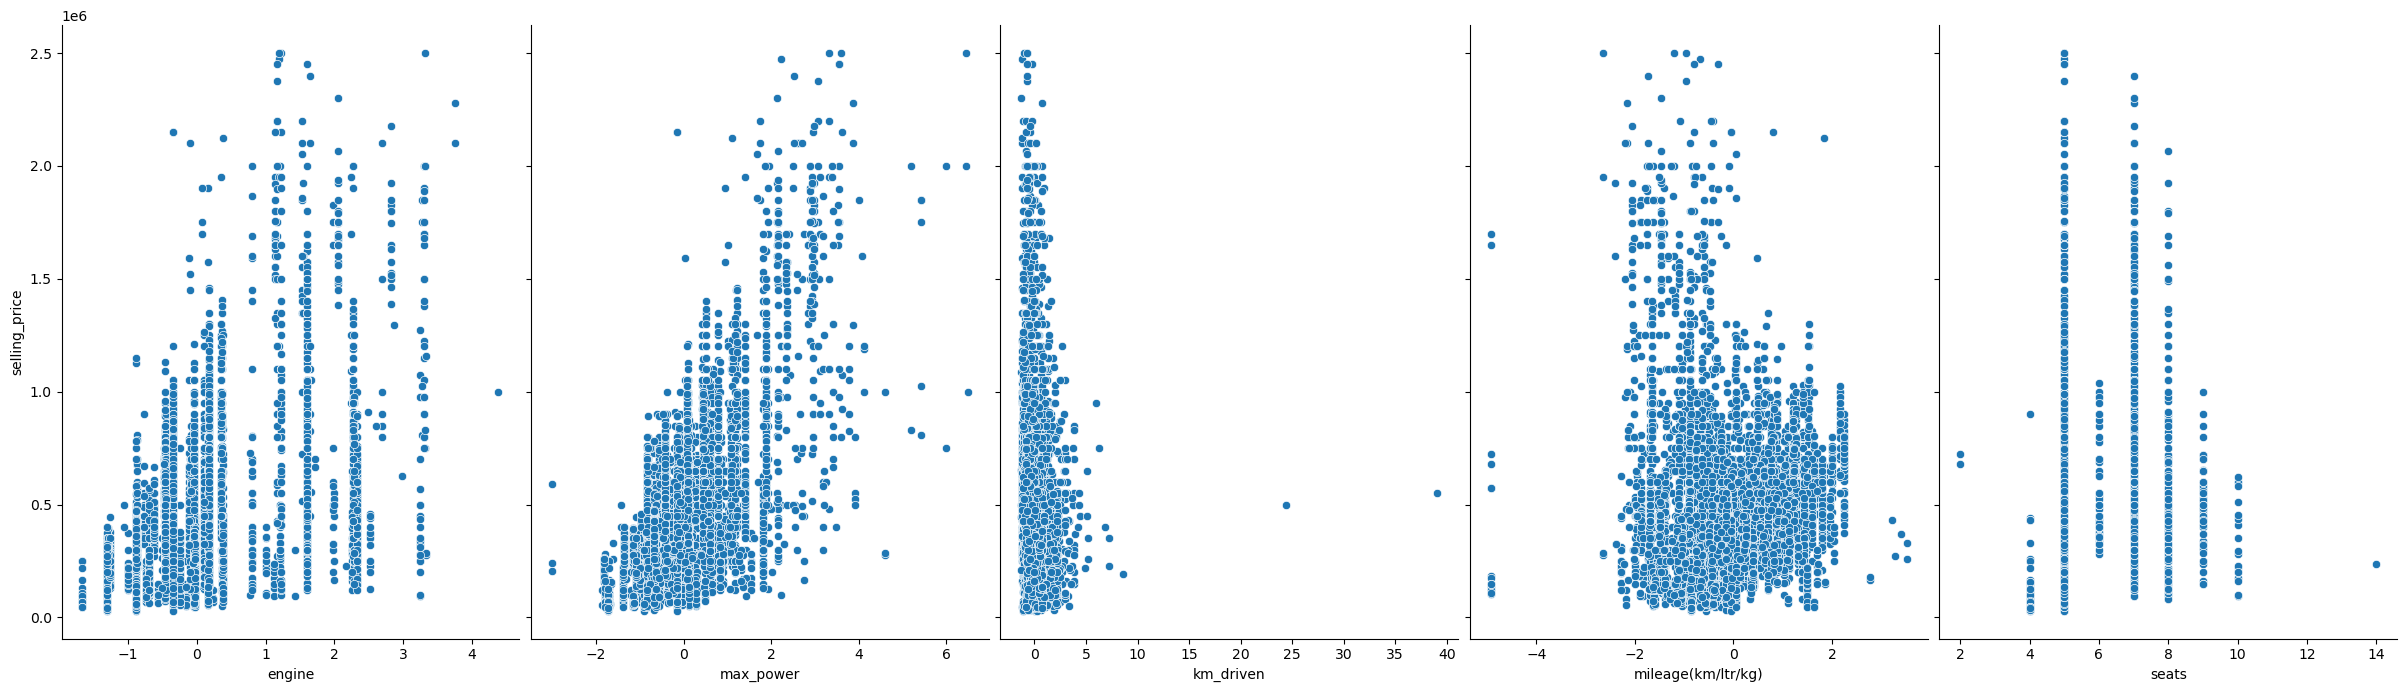

In [34]:
# visualising linearity
lin = sns.pairplot(df_encoded,x_vars=['engine','max_power','km_driven','mileage(km/ltr/kg)','seats'], y_vars=['selling_price'], height=7,aspect=0.7)

In [35]:
# fitting a linear regression model 
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
residuals = y_test- y_pred

# checking for the independence assumption
print("Durbin-Watson:", durbin_watson(residuals))


Durbin-Watson: 2.016826190485505


Text(0.5, 1.0, 'Scatter Plot of Residuals and Y-Predicted values for Homoskedasticity check')

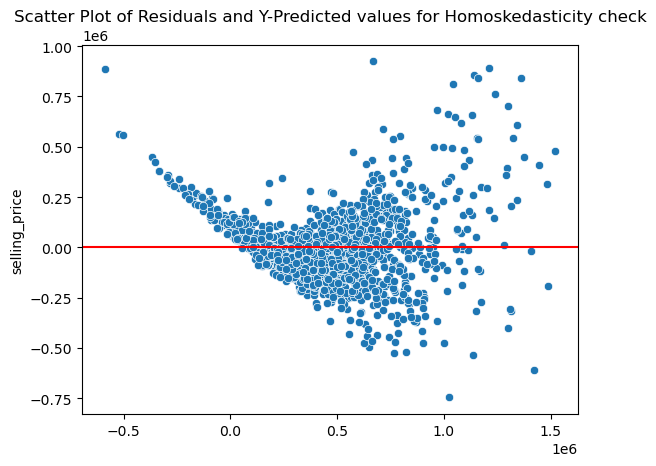

In [36]:
# Scatter plot of residuals and actual values
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(0, color="red")
plt.title("Scatter Plot of Residuals and Y-Predicted values for Homoskedasticity check")


In [37]:
# The models
lr = LinearRegression()
lasso = Lasso(alpha = 0.1)
ridge = Ridge(alpha = 1.0)

# for loop for the models
models = [lr,lasso,ridge]

#Initialize model
for model in models:
  #train models
  print(f"Training Model: {model}")
  mol = model.fit(X_train, y_train)
  #print("-"*50)

  # predicting
  print(f"Predicting on model: {model}")
  pred = mol.predict(X_test)
  #print("-"*50)

  # Intercept
  print("Intercept:", mol.intercept_)
  #print("-"*50)

  # Coeficients
  coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'Coefficient': mol.coef_
})
  print(coefficients)
  #print("-"*50)

  # MSE
  mse=mean_squared_error(y_test, pred).__round__(4)
  print(f"The MSE for {model}:", mse)
  #print("-"*50)

  r2=r2_score(y_test,pred)
  print(f"R2 Score for {model}:",r2)
  print("-"*50)

Training Model: LinearRegression()
Predicting on model: LinearRegression()
Intercept: 602734.6794139172
                         feature    Coefficient
0                           year  140633.918942
1                      km_driven  -26445.448738
2             mileage(km/ltr/kg)  -10643.950627
3                         engine   27323.267030
4                      max_power  151277.416356
5                          seats    7822.707365
6                    fuel_Diesel   85022.691746
7                       fuel_LPG   97937.291318
8                    fuel_Petrol   -7807.703134
9         seller_type_Individual  -50447.666365
10  seller_type_Trustmark Dealer   -8746.931447
11           transmission_Manual -159003.067824
12    owner_Fourth & Above Owner  -39264.400378
13            owner_Second Owner  -43417.001043
14          owner_Test Drive Car  639266.285111
15             owner_Third Owner  -56243.489631
The MSE for LinearRegression(): 32958214396.525
R2 Score for LinearRegression():

In [38]:
# Cross Validation on Ridge Regression
# Perform 5-fold cross-validation
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validation R² scores: [0.72021265 0.70274401 0.61198632 0.71287343 0.70333929]
Average R²: 0.690231142459727


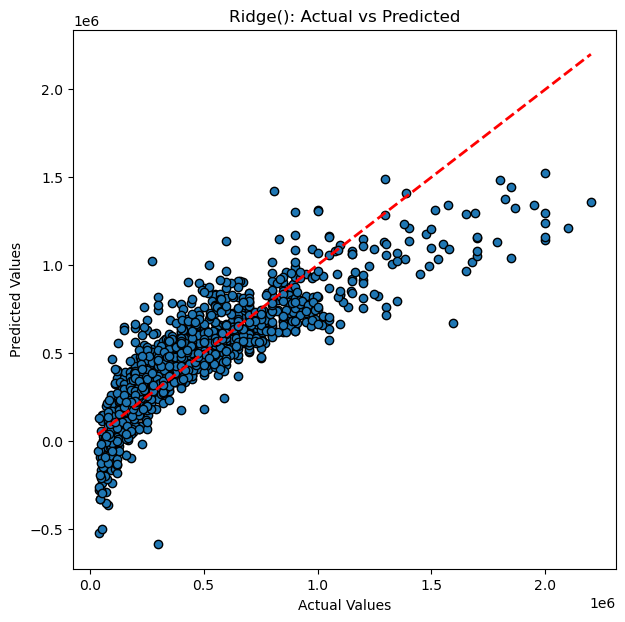

In [39]:
# Actual vs Predicted for the best performing model
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45° reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"{model}: Actual vs Predicted")
plt.show()

In [40]:
# Grid search CV
alpha ={'alpha':[0.01,0.1,1,10,50]}
grid_search = GridSearchCV(Ridge(),alpha,cv=5,scoring="r2")
grid_search.fit(X_train,y_train)

print("Most suitable alpha for Ridge:",grid_search.best_params_)
print("Best r2 score for Ridge:",grid_search.best_score_)

Most suitable alpha for Ridge: {'alpha': 0.1}
Best r2 score for Ridge: 0.6903437560484319


In [41]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
X_test_poly =poly.transform(X_test)

# Initialize and fit model
model=LinearRegression()
model.fit(x_train_poly,y_train)

# Prediction
y_train_predicted =model.predict(x_train_poly)
y_test_predicted =model.predict(X_test_poly)


In [42]:
# Polynomial Regression results
print("Train MSE:", mean_squared_error(y_train, y_train_predicted))
print("Train R²:", r2_score(y_train, y_train_predicted))
print("-"*25)
print("Test MSE:", mean_squared_error(y_test, y_test_predicted))
print("Test R²:", r2_score(y_test, y_test_predicted))


Train MSE: 18539952379.445206
Train R²: 0.836049064840125
-------------------------
Test MSE: 20212076777.055588
Test R²: 0.8259276465675148
